In [1]:
import pydub
import scipy.io.wavfile

In [128]:
import io
stream = io.BytesIO()
audio_segment = pydub.AudioSegment.from_mp3('/home/dante_gates/music/Music/Dave Brubeck Quartet/Time Out/03 Take Five.mp3')
audio_segment.export(stream, 'wav')
stream.seek(0)
sr, audio = scipy.io.wavfile.read(stream)

In [129]:
print(sr)
print(audio.dtype)
len(audio.shape)

44100
int16


2

In [130]:
audio[:1000]

array([[0, 0],
       [0, 0],
       [0, 0],
       ..., 
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int16)

In [131]:
audio = (audio.sum(axis=1) / 2).astype('int16')

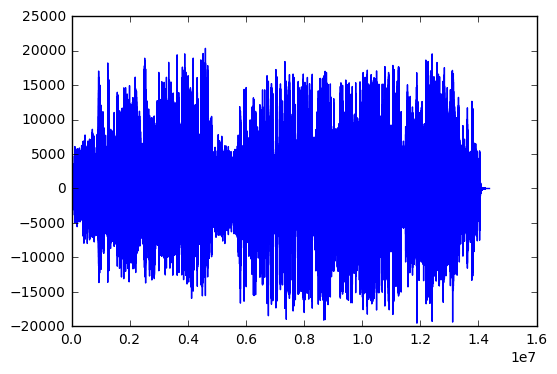

In [132]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(audio)

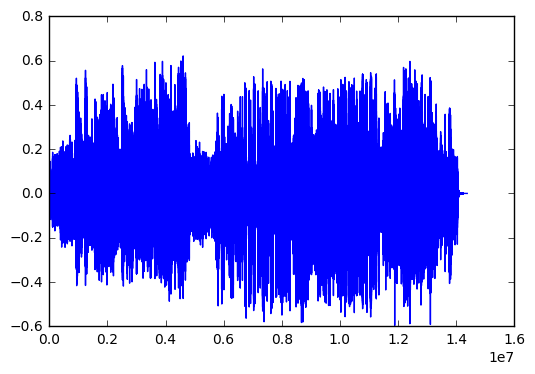

In [133]:
plt.plot(audio / 2**15)

CPU times: user 552 ms, sys: 40 ms, total: 592 ms
Wall time: 6.63 s


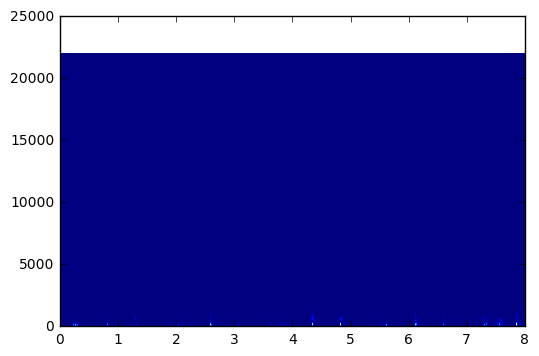

In [134]:
%%time

import scipy.signal
f, t, Sxx = scipy.signal.spectrogram(audio[:8*sr], sr, nfft=2**12)
plt.pcolormesh(t, f, Sxx)

In [135]:
print('f', f.shape)
print('t', t.shape)
print('Sxx', Sxx.shape)
print('Sxx', Sxx.dtype)
Sxx

f (2049,)
t (1574,)
Sxx (2049, 1574)
Sxx float32


array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          2.07040119e+01,   4.54457569e+00,   2.14325976e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          4.28853416e+01,   1.02142859e+01,   3.70902753e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          4.73780670e+01,   1.37715988e+01,   2.25184035e+00],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          8.30479863e-08,   1.15536623e-05,   3.67176071e-05],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          2.46557175e-08,   1.16174524e-05,   3.71354363e-05],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          2.42530773e-09,   5.81908898e-06,   1.86380712e-05]], dtype=float32)

In [136]:
t

array([  2.90249433e-03,   7.98185941e-03,   1.30612245e-02, ...,
         7.98258503e+00,   7.98766440e+00,   7.99274376e+00])

In [137]:
f

array([  0.00000000e+00,   1.07666016e+01,   2.15332031e+01, ...,
         2.20284668e+04,   2.20392334e+04,   2.20500000e+04])

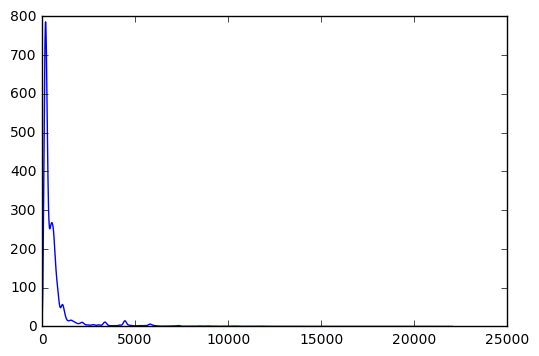

In [138]:
import numpy as np
plt.plot(f, np.mean(Sxx, axis=1))

In [139]:
f_scaled, t_scaled, Sxx_scaled = scipy.signal.spectrogram(audio[:8*sr] / 2**15, sr, nfft=2**12)
(Sxx - Sxx_scaled).max(axis=(0, 1))

35509.722623178997

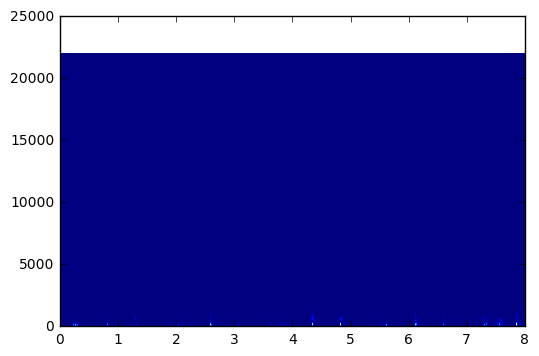

In [140]:
plt.pcolormesh(t_scaled, f_scaled, Sxx_scaled)

In [141]:
Sxx.max(axis=(0, 1)), Sxx_scaled.max(axis=(0, 1))

(35509.723, 3.3071006076186919e-05)

In [142]:
Sxx_scaled_mean = Sxx_scaled.mean(axis=1)

In [143]:
Sxx_scaled_mean.mean()

1.386925787317596e-08

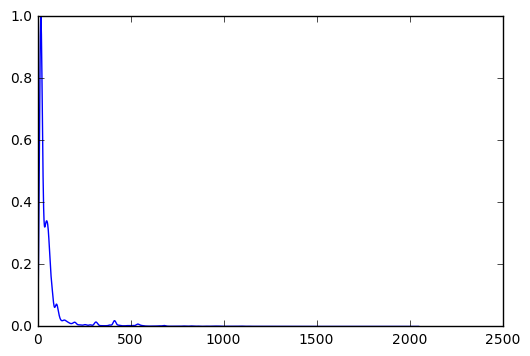

In [144]:
mn = Sxx_scaled_mean.min()
mx = Sxx_scaled_mean.max()
ff = (Sxx_scaled_mean - mn) / (mx - mn)
plt.plot(ff)

In [145]:
print(sum(ff < 0.1))
print(sum(ff >= 0.1))

1970
79


In [146]:
print(sum(ff < 0.1))
print(sum(ff >= 0.05))

1970
110


In [147]:
print(sum(ff[:200] < 0.1))
print(sum(ff[:200] >= 0.05))

121
110


In [148]:
f[200]

2153.3203125

### 